In [111]:
import sys
sys.path.insert(0, '/workspace/pyroomaccoustics/aaron_workspace')
import scriptlib
import numpy as np
import matplotlib.pyplot as plt
from math import radians
import pyroomacoustics as pra
from pyroomacoustics.directivities import (
    DirectivityPattern,
    DirectionVector,
    CardioidFamily,
)
import random
import math

p
94.18467926757899
90.80321117630878
1.0
0.0
p
94.18467926757899
90.80321117630878
1.0
0.0
118.01351437648341
92.91352789343566
1.0
0.0
70.35584415867459
105.65134623559946
1.0
0.0


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  


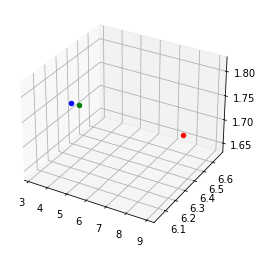

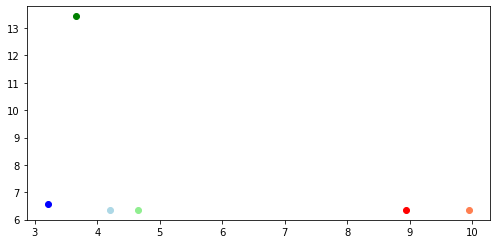

In [121]:
# 3 random positionen pos[0]= pos[1], pos[2], pos[3]
def random_position():
    positions = []

    for i in range(4):
        positions.append([random.random() * 10, random.random() * 15, 1.73])

    positions[1] = positions[0]
    dirs = get_directivities(positions)
    return positions, dirs

# 2 norm
def mag(x):
    return np.sqrt(np.sum(i**2 for i in x))


def get_directivities(positions):
    dirs = []
    # mittelwert aus postition 2 und 3
    h = [(positions[2][0] + positions[3][0])/2,
         (positions[2][1] + positions[3][1])/2]
    for position in positions:
        if position == positions[0]:
            print("p")
            #winkel zwischen mittelwert und (pos[0] , pos[1])
            angle = get_angle(position[:2], h)
        elif positions == positions[1]:
            #wie oben nur negativ
            angle = - get_angle(position[:2], h)
        else:
            angle = get_angle(position[:2], positions[0][:2])

        dirs.append([angle, 90])
    dirs[1][0] = 180 - dirs[0][0]  # not sure about this
    return dirs


def get_angle(a, b):
    #print(np.dot(a, b))
    #onrmalisertes skalarprod
    y = np.dot(a, b)/mag(a)*mag(b)
    #print(y)
    y = np.clip(y, -1, 1)
    #print(y)
    x = np.arccos(y)
    #print(x)
    return x


positions, dirs = random_position()

#3d positions display in room
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(positions[0][0], positions[0][1], positions[0][2], c='red')
ax.scatter(positions[2][0], positions[0][1], positions[0][2], c='green')
ax.scatter(positions[3][0], positions[0][1], positions[0][2], c='blue')


# 2d top view in room
fig2 = plt.figure()
ax2 = plt.axes()

ax2.scatter(positions[0][0], positions[0][1], c='red')
ax2.scatter(positions[2][0], positions[2][1], c='green')
ax2.scatter(positions[3][0], positions[3][1], c='blue')

ax2.scatter(np.cos(dirs[0][0])+positions[0][0],
            np.sin(dirs[0][0]) + positions[0][1], c='coral')
ax2.scatter(np.cos(dirs[2][0])+positions[2][0],
            np.sin(dirs[2][0]) + positions[0][1], c='lightgreen')
ax2.scatter(np.cos(dirs[3][0])+positions[3][0],
            np.sin(dirs[3][0]) + positions[0][1], c='lightblue')


In [100]:
x1 = 10
y1 = -50
angle = 30

sl = tan(radians(angle))
x = np.array(range(-10,10))
y = sl*(x-x1) + y1

pl.plot(x,y)
pl.show


NameError: name 'tan' is not defined

In [25]:
pattern = DirectivityPattern.CARDIOID
orientation = DirectionVector(azimuth=180, colatitude=90, degrees=True)

# create cardioid object
dir_obj = CardioidFamily(orientation=orientation, pattern_enum=pattern)

# plot
azimuth = np.linspace(start=0, stop=360, num=361, endpoint=True)
colatitude = np.linspace(start=0, stop=180, num=180, endpoint=True)
dir_obj.plot_response(azimuth=azimuth, colatitude=colatitude, degrees=True);

NameError: name 'DirectivityPattern' is not defined

In [49]:


mic_pattern = DirectivityPattern.CARDIOID

# create room with single source and microphone
room = pra.ShoeBox(
    p=[10, 15, 10],
    materials=pra.Material(0.4),
    fs=16000,
    max_order=40,
)
room.add_source(position=[5,9,1.7])
room.add_source(position=[2,1.7])
mic_dir = CardioidFamily(
    orientation=DirectionVector(azimuth=180, colatitude=0, degrees=True),
    pattern_enum=mic_pattern
)
mic_dir2 = CardioidFamily(
    orientation=DirectionVector(azimuth=0, colatitude=0, degrees=True), 
    pattern_enum=mic_pattern)
                          
source_dir2 = CardioidFamily(
    orientation=DirectionVector(azimuth=240, colatitude=110, degrees=True), 
    pattern_enum=mic_pattern)
                          
source_dir2 = CardioidFamily(
    orientation=DirectionVector(azimuth=330, colatitude=110, degrees=True), 
    pattern_enum=mic_pattern)
                          
room.add_microphone(loc=[3, 6.92, 1.75], directivity=mic_dir)
room.add_microphone(loc=[7, 7.08, 1.75], directivity=mic_dir2)

fig, ax = room.plot()
ax.set_xlim([0,15])
ax.set_ylim([0,15])
ax.set_zlim([0,15])
ax.set_title("")
fig.set_size_inches(20, 20);





ValueError: The Room and SoundSource objects must be of the same dimensionality. The Room is 3D but the SoundSource is 2D

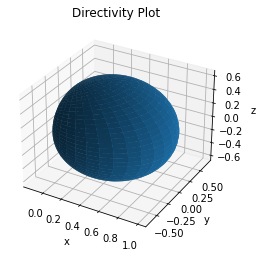

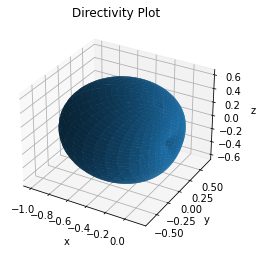

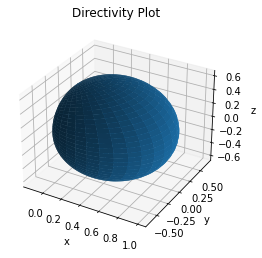

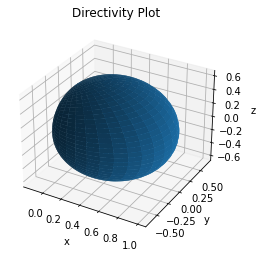

In [46]:
_, dirs = scriptlib.random_position()

for d in dirs:
    d = scriptlib.make_dir_cardioid(d)
    azimuth = np.linspace(start=0, stop=360, num=361, endpoint=True)
    colatitude = np.linspace(start=0, stop=180, num=180, endpoint=True)
    d.plot_response(azimuth=azimuth, colatitude=colatitude, degrees=True);

In [36]:
azimuth = np.linspace(start=0, stop=360, num=361, endpoint=True)
colatitude = np.linspace(start=0, stop=180, num=180, endpoint=True)
dir_obj.plot_response(azimuth=azimuth, colatitude=colatitude, degrees=True);

NameError: name 'dir_obj' is not defined

In [ ]:
_, dirs = scriptlib.random_position()
x = np.linespace(start=0, stop=